In [81]:
import pandas as pd
import numpy as np


LOADING THE DATA FROM DRIVE

In [82]:
data=pd.read_csv('/content/drive/MyDrive/Onebanc Assignment/CleanStatements.csv')
#data=pd.read_csv("CleanStatements.csv")


**SAW FEW ROWS OF DATA** 

In [83]:
print(data.head())

         Date                     Description  ...    State Country
0  12-12-2019  THE ROOM               GURGAON  ...  Haryana   India
1  12-12-2019            CUT AND STYLEGURGAON  ...  Haryana   India
2  12-12-2019                   MUMUSOGURGAON  ...  Haryana   India
3  12-12-2019  THE ROOM               GURGAON  ...  Haryana   India
4  12-12-2019  THE ROOM               GURGAON  ...  Haryana   India

[5 rows x 12 columns]


## **INFORMATION ABOUT OUR DATASET**

In [84]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1748 non-null   object 
 1   Description                   1747 non-null   object 
 2   InternationTransactionAmount  1748 non-null   float64
 3   Category                      1141 non-null   object 
 4   Amount                        1748 non-null   float64
 5   TransactionUserName           1748 non-null   object 
 6   TransactionType               1748 non-null   object 
 7   IsoCurrency                   1748 non-null   object 
 8   Locality                      1523 non-null   object 
 9   City                          1493 non-null   object 
 10  State                         1464 non-null   object 
 11  Country                       1533 non-null   object 
dtypes: float64(2), object(10)
memory usage: 164.0+ KB
None


**MISSING VALUES IN DATA**

In [85]:
#for missing value in Internaation transaction amount
print("missing value in transaction internation=",data.iloc[:,2].isnull().sum())

missing value in transaction internation= 0


In [86]:
print("missing value in category=",data.iloc[:,3].isnull().sum())

missing value in category= 607


In [87]:
#how many category in category
category=data.iloc[:,3].unique().tolist()
print(category)

['Video game', 'Occupation', nan, 'E-commerce company', 'City in India', 'Cafe company', 'New York City borough', 'Plants', 'Hotel brand', 'Electronics retail company', 'Ridesharing company', '1988 film', 'Company', 'Indian actress', 'American television program', 'City in California', 'Band', 'Health care company', 'Language family', 'Fictional character', 'Restaurant company', 'City in New York', 'Cinema company', 'American minister', 'City in the island of Montreal', 'Song by Drew Seeley', 'American actor', 'Dish', 'Canadian model', '2015 film', 'Radio station', 'Animal', 'Fast food company', 'Political party', 'Retail company', 'Telecommunications company', 'Unit of speed', 'Novel by Jules Verne', 'Former Chief Minister of Uttar Pradesh', 'Corporation', 'Massif in Nepal', 'Dog breed', 'Insurance company', 'Italian region', 'Novel by Jane Austen', 'Coffeehouse company', 'Event', 'Fast food restaurant company', 'Department store company', 'Poem by Tulsidas', 'Indian researcher', 'Bui

In [88]:
print(data.iloc[:,3].nunique())

184


**Copy the objects type of data into new copy_data for treating the missing values**

In [89]:
copy_data=data.select_dtypes(include=['object','float']).copy()

In [90]:
print(copy_data.head())

         Date                     Description  ...    State Country
0  12-12-2019  THE ROOM               GURGAON  ...  Haryana   India
1  12-12-2019            CUT AND STYLEGURGAON  ...  Haryana   India
2  12-12-2019                   MUMUSOGURGAON  ...  Haryana   India
3  12-12-2019  THE ROOM               GURGAON  ...  Haryana   India
4  12-12-2019  THE ROOM               GURGAON  ...  Haryana   India

[5 rows x 12 columns]


In [91]:
# total number  of missing values in categorical data column
print(copy_data.isnull().values.sum())

1587


In [92]:
print(copy_data.isnull().sum())

Date                              0
Description                       1
InternationTransactionAmount      0
Category                        607
Amount                            0
TransactionUserName               0
TransactionType                   0
IsoCurrency                       0
Locality                        225
City                            255
State                           284
Country                         215
dtype: int64


In [93]:
# COUNTING THE OCCURRENCE OF EACH VALUES IN CATEGORY COLUMN
print(copy_data['Category'].value_counts())

Cafe company                     147
Video game                       125
E-commerce company               105
Company                           70
Hotel brand                       40
                                ... 
Song by Devi                       1
Profession                         1
Multi-level marketing company      1
VFX company                        1
Song by Chris Costanzo             1
Name: Category, Length: 184, dtype: int64


**Filling the missing values of category**

In [94]:
# filling the missing vlaues of category with top 3 frequent values of category
copy_data['Category']=copy_data['Category'].fillna(copy_data['Category'].value_counts().index[0],limit=205)
copy_data['Category']=copy_data['Category'].fillna(copy_data['Category'].value_counts().index[1],limit=202)
copy_data['Category']=copy_data['Category'].fillna(copy_data['Category'].value_counts().index[2])


In [95]:
print(copy_data.isnull().sum())

Date                              0
Description                       1
InternationTransactionAmount      0
Category                          0
Amount                            0
TransactionUserName               0
TransactionType                   0
IsoCurrency                       0
Locality                        225
City                            255
State                           284
Country                         215
dtype: int64


In [96]:
# Ater filling the missing  data of Category by most top 3 frequent category
print(copy_data['Category'].value_counts())

Cafe company                     352
Video game                       327
E-commerce company               305
Company                           70
Hotel brand                       40
                                ... 
Song by Devi                       1
Profession                         1
Multi-level marketing company      1
VFX company                        1
Song by Chris Costanzo             1
Name: Category, Length: 184, dtype: int64


**NOW HANDLLING THE MISSING VALUES OF LOCALITY,CITY,STATE,COUNTRY**

In [97]:
copy_data['Locality']=copy_data['Locality'].fillna(copy_data['Locality'].value_counts().index[0])
copy_data['City']=copy_data['City'].fillna(copy_data['City'].value_counts().index[0])
copy_data['State']=copy_data['State'].fillna(copy_data['State'].value_counts().index[0])
copy_data['Country']=copy_data['Country'].fillna(copy_data['Country'].value_counts().index[0])



In [98]:
print(copy_data.isnull().sum())

Date                            0
Description                     1
InternationTransactionAmount    0
Category                        0
Amount                          0
TransactionUserName             0
TransactionType                 0
IsoCurrency                     0
Locality                        0
City                            0
State                           0
Country                         0
dtype: int64


**After treating the all categorical values of our dataset we find that in Description 1 value is missing we simply ignore or delete this value becuse this is not large impact but if we need to treat then we can do by folloeing code**

In [99]:
copy_data['Description']=copy_data['Description'].fillna(copy_data['Description'].value_counts().index[0])

**NOW THERE IS NO NULL VALUE OR MISSING VALUE IN OUR DATASET**

In [100]:
# Now finally we are done with treatment of missing values in object datatype
print(copy_data.isnull().sum())

Date                            0
Description                     0
InternationTransactionAmount    0
Category                        0
Amount                          0
TransactionUserName             0
TransactionType                 0
IsoCurrency                     0
Locality                        0
City                            0
State                           0
Country                         0
dtype: int64


**now after dealing with objects type of data let looks other type of data**

In [101]:
print(copy_data['Category'].value_counts())

Cafe company                     352
Video game                       327
E-commerce company               305
Company                           70
Hotel brand                       40
                                ... 
Song by Devi                       1
Profession                         1
Multi-level marketing company      1
VFX company                        1
Song by Chris Costanzo             1
Name: Category, Length: 184, dtype: int64


In [102]:
print(copy_data['Category'].unique().tolist())


['Video game', 'Occupation', 'Cafe company', 'E-commerce company', 'City in India', 'New York City borough', 'Plants', 'Hotel brand', 'Electronics retail company', 'Ridesharing company', '1988 film', 'Company', 'Indian actress', 'American television program', 'City in California', 'Band', 'Health care company', 'Language family', 'Fictional character', 'Restaurant company', 'City in New York', 'Cinema company', 'American minister', 'City in the island of Montreal', 'Song by Drew Seeley', 'American actor', 'Dish', 'Canadian model', '2015 film', 'Radio station', 'Animal', 'Fast food company', 'Political party', 'Retail company', 'Telecommunications company', 'Unit of speed', 'Novel by Jules Verne', 'Former Chief Minister of Uttar Pradesh', 'Corporation', 'Massif in Nepal', 'Dog breed', 'Insurance company', 'Italian region', 'Novel by Jane Austen', 'Coffeehouse company', 'Event', 'Fast food restaurant company', 'Department store company', 'Poem by Tulsidas', 'Indian researcher', 'Building

**Tagging the new Key to the category value into new column Expenses Type using Dictionary**

In [103]:
dict1={
    "Food":["Cafe company","Dish","Fast food company","Italian region",'Coffeehouse company','Fast food restaurant company','Online food ordering company',
            "Pasta","Cocktail","Food",'Restaurant company','Heavy bomber','Continent'],


    "Outdoor stay":["Hotel chain",'Hotel brand','Town in Hokkaido','City in Algeria','Place of worship in Kiev','Palace in Jaipur','Street in London',
                    'Hospitality company','Hotel company','City in Spain','City in Japan'],


    "Entertainment": ['1988 film', 'Company','American director','2018 film', 'Actor','1984 film','2001 film','Indian drama series','1974 film',
                     '2017 film','2014 film', 'Guerrilla war', 'American television program','Band','Fictional character','1989 film', 'Automotive marque',
                     'Song by Chris Costanzo', 'Film series', 'Oceanic trench','Cinema company','Song by Drew Seeley',
                     'American actor','Canadian model','2015 film','Radio station','Comedian','Indian actor','Entertainment company'
                     ,'American actress','Album by The Beach Boys','Nightclub','Canadian singer-songwriter','Song by Queen','Television series',
                     'Indian television actor','Indian actress',
                     'Theatre in Taunton','VFX company','Film director','1993 film','American singer-songwriter','German singer','1976 film',
                     'Song by 4Joy', 'Indian playback singer','American-German model',  'American film actress', '1967 film', 'Song by Devi', 
                     'Television channel', 'Landform',
                     'Song', 'Indian film actor','Song by Rhye','Television company', 'King', 'Indian businessman', 'Song by The Botherers'],

    "Shopping":["E-commerce company",'Retail chain company','Electronics retail company','Furniture retail company','Discount store company',
                'Hypermarket company','Hardware store company','US State','Cosmetics company','Retail company','Department store company',
                'Clothing retail company','Fashion company'],
               

    "Flight":['City in India','New York City borough','City in California','City in New York','City in the island of Montreal','Massif in Nepal',
              'International airline','Capital of the USA','Airline', 'Indian union territory'],
               

    "Cab":['Unit of speed','Railway company','American sitcom','Unit of time'],


    "Livelyhood":['Occupation','Profession', 'Company','Technology company','Supermarket company','Corporation','State-owned enterprise','Operation','Event',
                  'Multi-level marketing company','Building function','Car manufacturer','Production company','Private club','Ethno-linguistic group',
                  'Multinational conglomerate company'],
               

    "Environment":['Plants','Animal','Dog breed','Algae'],


    "Health safety":['Health care company','Insurance company','Fungus','Agency', 'Medication'],


    "Education":["Language family",'Novel by Jules Verne','Chemical element','Novel by Jane Austen','Poem by Tulsidas','Indian researcher','Field of study',
                 'Chemical compound','Book by Rudyard Kipling',
                 'Architectural style','Book by Alan Beaulieu','Novel by Tamsyn Muir','Book by Eric Carle','Newspaper','Indian language',
                 'Book by A. C. Bhaktivedanta Swami Prabhupada','Board of education in India', 'Book by Jean Ferris', 'Indian revolutionary',
                 'Book by Tavleen Singh','Book by Thomas Sowell','Novel by Jonathan Maberry', 'Festivity','Indian teacher', 'Guru','Novel by Lewis Carroll'],
               

    "Politics":['American minister','Political party','Former Chief Minister of Uttar Pradesh','Politician','Legislator','Former President of South Africa',
                'Former Governor General of Canada','Member of parliament'],
               

    "TeleCommunication":['Telecommunications company','Mobile phone','Broadcast genre','Mobile network provider company','Broadcasting service'],

    
    "Bank": ['State of India','Federal agency'],

    "Sports":['Sports club','Footballer', 'Visual art form','Malaysian footballer','Indian cricketer',"Video game",'Baseball team','American football team',
              'Ridesharing company']
  }

**Adding new value in Expense Type column**

In [104]:
def create_expense_type_column(input_dict,column_data):
  list1=[]
 
  for i in range(len(column_data)):
    for key,value in input_dict.items():
      
      if column_data[i] in value:
        list1.append(key)
        
        break
    
  return list1


In [105]:

expenses=create_expense_type_column(dict1,copy_data['Category'])
print(expenses)

['Sports', 'Livelyhood', 'Food', 'Sports', 'Sports', 'Shopping', 'Flight', 'Food', 'Shopping', 'Shopping', 'Food', 'Food', 'Flight', 'Environment', 'Food', 'Food', 'Outdoor stay', 'Food', 'Food', 'Food', 'Food', 'Food', 'Sports', 'Shopping', 'Food', 'Food', 'Food', 'Food', 'Sports', 'Sports', 'Entertainment', 'Entertainment', 'Food', 'Entertainment', 'Sports', 'Food', 'Entertainment', 'Sports', 'Flight', 'Sports', 'Food', 'Entertainment', 'Food', 'Entertainment', 'Sports', 'Sports', 'Food', 'Food', 'Outdoor stay', 'Health safety', 'Education', 'Food', 'Food', 'Shopping', 'Food', 'Food', 'Entertainment', 'Entertainment', 'Food', 'Food', 'Food', 'Shopping', 'Shopping', 'Food', 'Entertainment', 'Food', 'Shopping', 'Entertainment', 'Sports', 'Food', 'Food', 'Flight', 'Food', 'Entertainment', 'Politics', 'Food', 'Food', 'Flight', 'Food', 'Food', 'Politics', 'Food', 'Entertainment', 'Entertainment', 'Entertainment', 'Food', 'Food', 'Entertainment', 'Food', 'Food', 'Entertainment', 'Shopping'

In [106]:
#our old data with 12 column
new_data1=copy_data

print(new_data1)

            Date                     Description  ...        State Country
0     12-12-2019  THE ROOM               GURGAON  ...      Haryana   India
1     12-12-2019            CUT AND STYLEGURGAON  ...      Haryana   India
2     12-12-2019                   MUMUSOGURGAON  ...      Haryana   India
3     12-12-2019  THE ROOM               GURGAON  ...      Haryana   India
4     12-12-2019  THE ROOM               GURGAON  ...      Haryana   India
...          ...                             ...  ...          ...     ...
1743  07-07-2019        CAFE COFFEE DAYILD TRADE  ...      Haryana   India
1744  07-07-2019  SHOPPERS STOP LTD      GURGAON  ...      Haryana   India
1745  11-07-2019                   INDIGOGURGAON  ...      Haryana   India
1746  11-07-2019                   INDIGOGURGAON  ...      Haryana   India
1747  11-07-2019       TATA INDICOM-DOCOMOMUMBAI  ...  Maharashtra   India

[1748 rows x 12 columns]


**New column Expenses adding in last column now the size of data become 1748x13**

In [107]:
new_data1['Expenses Type']=expenses
print(new_data1.shape)

(1748, 13)


In [108]:
print(new_data1['Expenses Type'].unique())

['Sports' 'Livelyhood' 'Food' 'Shopping' 'Flight' 'Environment'
 'Outdoor stay' 'Entertainment' 'Health safety' 'Education' 'Politics'
 'TeleCommunication' 'Cab' 'Bank']


In [109]:
#changing the negative value into positive of Amount column
new_data1['Amount']=new_data1['Amount'].abs()


In [110]:
print(new_data1['Amount'].sum())

8434505.51


**Save our cleaned or modified data into new csv file**

In [111]:
new_data1.to_csv("final_output.csv",index=None)


**Now get sum and average of Amount Spending on different types expenses**

In [112]:
occur_expense_type=new_data1.groupby('Expenses Type').Amount.nunique()

In [113]:
print(occur_expense_type)

Expenses Type
Bank                   2
Cab                   19
Education             57
Entertainment        182
Environment           16
Flight                58
Food                 348
Health safety          6
Livelyhood            81
Outdoor stay          40
Politics              24
Shopping             308
Sports               261
TeleCommunication     17
Name: Amount, dtype: int64


In [114]:
#calculate sum and mean of each type of expeses using groupby
data_mean=new_data1.groupby('Expenses Type').Amount.mean()
print(data_mean)

Expenses Type
Bank                  1370.000000
Cab                   5207.567143
Education             2027.325254
Entertainment         4484.214047
Environment           1317.176471
Flight                4238.006613
Food                  4553.810537
Health safety        13951.465000
Livelyhood            1092.038090
Outdoor stay          4558.756552
Politics              1448.227586
Shopping              5559.219738
Sports                6716.632529
TeleCommunication     1114.429048
Name: Amount, dtype: float64


In [115]:
data_sum1=new_data1.groupby('Expenses Type').Amount.sum()
print(data_sum1.keys())
print(data_sum1.value_counts)


Index(['Bank', 'Cab', 'Education', 'Entertainment', 'Environment', 'Flight',
       'Food', 'Health safety', 'Livelyhood', 'Outdoor stay', 'Politics',
       'Shopping', 'Sports', 'TeleCommunication'],
      dtype='object', name='Expenses Type')
<bound method IndexOpsMixin.value_counts of Expenses Type
Bank                    2740.00
Cab                   109358.91
Education             119612.19
Entertainment         964106.02
Environment            22392.00
Flight                262756.41
Food                 2035553.31
Health safety          83708.79
Livelyhood             97191.39
Outdoor stay          264407.88
Politics               41998.60
Shopping             2123621.94
Sports               2283655.06
TeleCommunication      23403.01
Name: Amount, dtype: float64>


In [116]:
df=pd.DataFrame(new_data1)
print(df['Expenses Type'].unique())

['Sports' 'Livelyhood' 'Food' 'Shopping' 'Flight' 'Environment'
 'Outdoor stay' 'Entertainment' 'Health safety' 'Education' 'Politics'
 'TeleCommunication' 'Cab' 'Bank']


**Plotting the Bar and pie chart for mean or average of our Expenses type in our dataset**

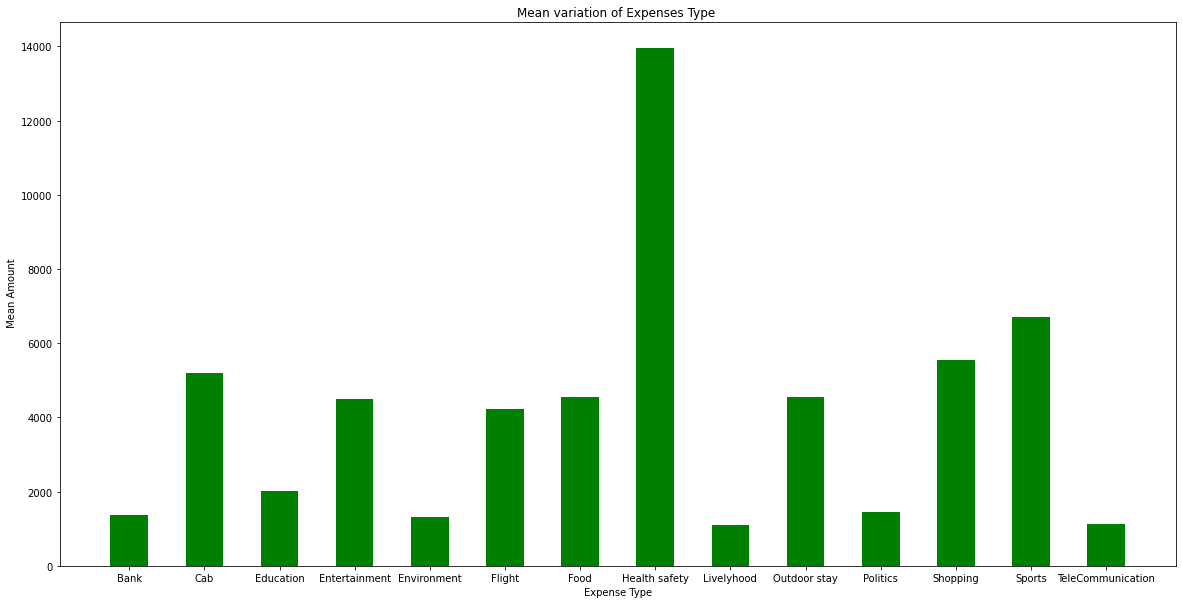

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("Mean variation of Expenses Type ")


plt.bar(data_mean.keys(),data_mean,width=0.5,color='g')
plt.xlabel("Expense Type")
plt.ylabel(" Mean Amount")
plt.show()

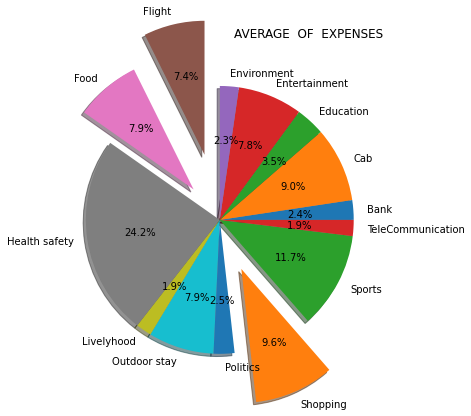

In [118]:
import matplotlib.pyplot as plt
explode=(0,0,0,0,0,0.5,.3,0,0,0,0,0.4,0,0)
plt.figure(figsize=(6,15))
plt.pie(data_mean,labels=data_mean.keys(),autopct='%1.1f%%',
        shadow=True,explode=explode)
plt.title("AVERAGE  OF  EXPENSES ",loc='right',pad=15)

plt.show()


**NOW WE GOING TO PLOT SUM OF EXPENSES IN BOTH BAR GRAPH AND PIE CHART**

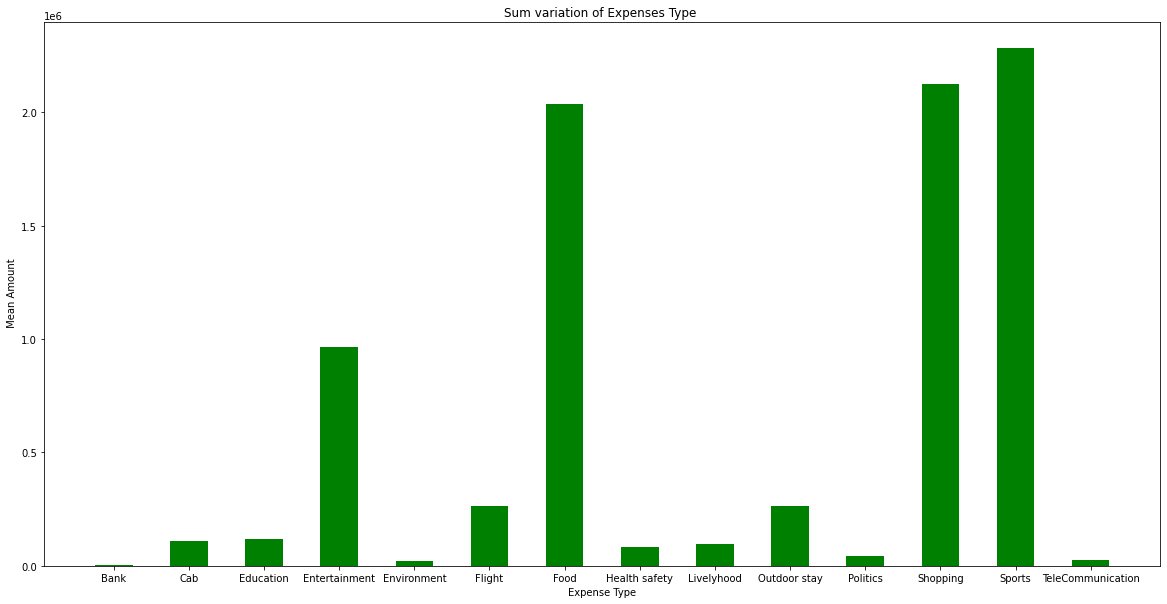

In [119]:
plt.figure(figsize=(20,10))
plt.title("Sum variation of Expenses Type ")


plt.bar(data_sum1.keys(),data_sum1,width=0.5,color='g')
plt.xlabel("Expense Type")
plt.ylabel(" Mean Amount")
plt.show()

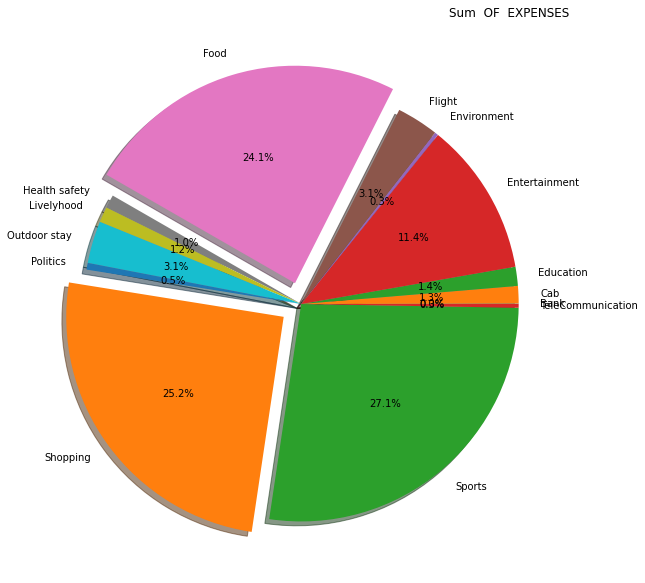

In [120]:
#pie chart
explode=(0,0,0,0,0,0,0.1,0,0,0,0,0.1,0,0)
plt.figure(figsize=(10,10))
plt.pie(data_sum1,labels=data_sum1.keys(),autopct='%1.1f%%',
        shadow=True,explode=explode)
plt.title("Sum  OF  EXPENSES ",loc='right',pad=15)

plt.show()


#**1.By wathing the pie graph all is clear that how much of money in our data in which type of category Now we can easily answer that the person is impusive shopper and  also lthe peron is Foody and love to eat Food**

In [121]:
#converting the data into order of date wise
data2=new_data1
print(data2)


            Date                     Description  ...  Country Expenses Type
0     12-12-2019  THE ROOM               GURGAON  ...    India        Sports
1     12-12-2019            CUT AND STYLEGURGAON  ...    India    Livelyhood
2     12-12-2019                   MUMUSOGURGAON  ...    India          Food
3     12-12-2019  THE ROOM               GURGAON  ...    India        Sports
4     12-12-2019  THE ROOM               GURGAON  ...    India        Sports
...          ...                             ...  ...      ...           ...
1743  07-07-2019        CAFE COFFEE DAYILD TRADE  ...    India          Food
1744  07-07-2019  SHOPPERS STOP LTD      GURGAON  ...    India      Shopping
1745  11-07-2019                   INDIGOGURGAON  ...    India      Shopping
1746  11-07-2019                   INDIGOGURGAON  ...    India      Shopping
1747  11-07-2019       TATA INDICOM-DOCOMOMUMBAI  ...    India      Politics

[1748 rows x 13 columns]


#**Converting date column from objects type to datetime type and then sorting all data according to date in ascending order**

In [122]:
data2['Date']=pd.to_datetime(data2['Date'],dayfirst=True)
print(data2['Date'].dtype)
data2=data2.sort_values(by=['Date'])
print(data2.shape)
print(data2.tail(30))

datetime64[ns]
(1748, 13)
          Date  ...  Expenses Type
760 2020-03-19  ...         Sports
761 2020-03-20  ...   Outdoor stay
762 2020-03-20  ...  Entertainment
764 2020-03-21  ...       Politics
763 2020-03-21  ...       Politics
766 2020-03-21  ...       Politics
765 2020-03-21  ...         Sports
767 2020-03-22  ...       Shopping
768 2020-03-22  ...       Shopping
770 2020-03-23  ...         Sports
769 2020-03-23  ...       Politics
771 2020-03-24  ...         Sports
772 2020-03-25  ...         Sports
773 2020-03-25  ...       Shopping
774 2020-03-26  ...         Sports
775 2020-03-28  ...     Livelyhood
776 2020-03-29  ...         Sports
777 2020-03-29  ...  Entertainment
778 2020-03-30  ...         Sports
779 2020-03-31  ...         Sports
780 2020-04-01  ...       Shopping
781 2020-04-01  ...       Politics
782 2020-04-03  ...       Shopping
783 2020-04-04  ...       Shopping
784 2020-04-04  ...         Sports
785 2020-04-05  ...  Entertainment
786 2020-04-05  ...  Entertai

#**Remove the '#' from the following code to save in data in sorted order by date to new csv file**

In [123]:
#data2.to_csv("final_output.csv",index=None)

#**1Q: what was my  last month  bill? Answer is bellow**

In [124]:
#CALCULATING LAST GIVE DAYS DAYS BILL
def calculate_last_one_month_exp(input_data,n):
  month_exp=data2[-n:].groupby('Expenses Type').Amount.sum()
  return month_exp
total_day_for_bill=90
n_days_bill=calculate_last_one_month_exp(data2,total_day_for_bill)
print(n_days_bill)

Expenses Type
Education          2160.98
Entertainment     59158.75
Environment        2597.00
Flight             2058.00
Food               4366.85
Livelyhood         9636.40
Outdoor stay       3261.09
Politics          12191.00
Shopping          21779.36
Sports           463503.21
Name: Amount, dtype: float64


In [125]:
print("Last days FOOD bill: ",n_days_bill.Food)

Last days FOOD bill:  4366.85


#**FROM GRAPH OF OUR NEW DATA WE CAN FIND NUBER OF ANSWER OF THE QESTIONS -------------------------END OF ASSIGNMENT OF ONE BANC --------CODE WRITTEN BY SANDEEP YADAV, FOR ANY QUERY RELATED TO CODE YOU CAN CONATCT ME AT MY MAIL: sandeep18498@gmail.com**